Import necessary libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import math

Define the neural network architecture

In [2]:
class CustomNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.h1 = nn.Linear(28 * 28, 128)
        self.act1 = nn.ReLU()
        self.h2 = nn.Linear(128, 64)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.act1(self.h1(x))
        x = self.act2(self.h2(x))
        x = self.output(x)
        return x

 Data preprocessing and loading

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

training_data, validation_data, training_labels, validation_labels = train_test_split(
    mnist_data.data, mnist_data.targets, stratify=mnist_data.targets, test_size=0.2, random_state=42
)

training_dataset = torch.utils.data.TensorDataset(training_data.float() / 255.0, training_labels)
validation_dataset = torch.utils.data.TensorDataset(validation_data.float() / 255.0, validation_labels)


Training function

In [4]:
def training_loop(learning_rate, batch_size):
    # Create the model
    model = CustomNN()

    # Define the loss function and optimizer
    loss_function = nn.CrossEntropyLoss()
    optimizing_function = optim.SGD(model.parameters(), lr=learning_rate)

    # Adjust batch size
    training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=batch_size, shuffle=True)
    validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=batch_size, shuffle=False)

    # Training parameters
    num_epochs = 10
    training_losses, validation_losses, training_accuracies, validation_accuracies = [], [], [], []
    best_validation_loss = math.inf
    best_model = None

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in training_loader:
            optimizing_function.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizing_function.step()

        model.eval()
        with torch.no_grad():
            # Calculate training and validation metrics
            training_loss = sum(loss_function(model(inputs), labels) for inputs, labels in training_loader)
            training_accuracy = sum((model(inputs).argmax(dim=1) == labels).float().mean().item() for inputs, labels in training_loader)
            validation_loss = sum(loss_function(model(inputs), labels) for inputs, labels in validation_loader)
            validation_accuracy = sum((model(inputs).argmax(dim=1) == labels).float().mean().item() for inputs, labels in validation_loader)

        # Normalize metrics
        validation_loss /= len(validation_loader)
        validation_accuracy /= len(validation_loader)
        training_loss /= len(training_loader)
        training_accuracy /= len(training_loader)

        # Update best model if validation loss improves
        if validation_loss < best_validation_loss:
            best_model = model
            best_validation_loss = validation_loss

        # Store metrics for plotting
        training_losses.append(training_loss.item())
        validation_losses.append(validation_loss.item())
        training_accuracies.append(training_accuracy)
        validation_accuracies.append(validation_accuracy)

        # Print epoch-wise metrics
        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Training Loss is: {training_loss:.4f}, Training Accuracy is: {training_accuracy:.4f}, '
              f'Validation Loss is: {validation_loss:.4f}, Validation Accuracy is: {validation_accuracy:.4f}')

    # Plot the metrics
    plt.plot(training_losses, label=f'Loss of Training  (LR={learning_rate}, Batch Size={batch_size})')
    plt.plot(validation_losses, label=f'Loss of Validation  (LR={learning_rate}, Batch Size={batch_size})')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    plt.plot(training_accuracies, label=f'Training Accuracy (LR={learning_rate}, Batch Size={batch_size})')
    plt.plot(validation_accuracies, label=f'Validation Accuracy (LR={learning_rate}, Batch Size={batch_size})')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

    return best_model, best_validation_loss

Hyperparameter tuning loop


Training with Learning Rate: 0.001, Batch Size: 32
Epoch 1/10, Training Loss is: 2.2611, Training Accuracy is: 0.2378, Validation Loss is: 2.2615, Validation Accuracy is: 0.2385
Epoch 2/10, Training Loss is: 2.1738, Training Accuracy is: 0.3999, Validation Loss is: 2.1745, Validation Accuracy is: 0.4015
Epoch 3/10, Training Loss is: 1.9730, Training Accuracy is: 0.5386, Validation Loss is: 1.9744, Validation Accuracy is: 0.5417
Epoch 4/10, Training Loss is: 1.6018, Training Accuracy is: 0.6946, Validation Loss is: 1.6038, Validation Accuracy is: 0.6953
Epoch 5/10, Training Loss is: 1.1742, Training Accuracy is: 0.7816, Validation Loss is: 1.1763, Validation Accuracy is: 0.7827
Epoch 6/10, Training Loss is: 0.8754, Training Accuracy is: 0.8169, Validation Loss is: 0.8767, Validation Accuracy is: 0.8188
Epoch 7/10, Training Loss is: 0.7046, Training Accuracy is: 0.8363, Validation Loss is: 0.7051, Validation Accuracy is: 0.8380
Epoch 8/10, Training Loss is: 0.6026, Training Accuracy is:

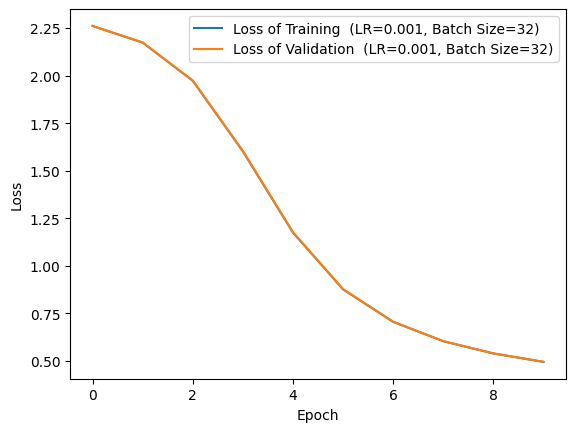

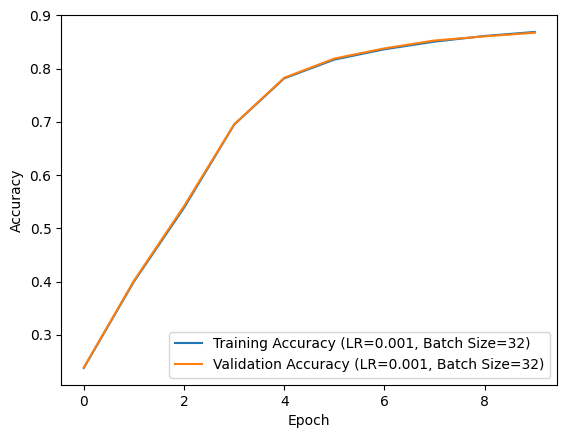


Training with Learning Rate: 0.001, Batch Size: 64
Epoch 1/10, Training Loss is: 2.2838, Training Accuracy is: 0.1749, Validation Loss is: 2.2841, Validation Accuracy is: 0.1707
Epoch 2/10, Training Loss is: 2.2588, Training Accuracy is: 0.2412, Validation Loss is: 2.2593, Validation Accuracy is: 0.2399
Epoch 3/10, Training Loss is: 2.2258, Training Accuracy is: 0.3244, Validation Loss is: 2.2265, Validation Accuracy is: 0.3235
Epoch 4/10, Training Loss is: 2.1784, Training Accuracy is: 0.4053, Validation Loss is: 2.1793, Validation Accuracy is: 0.4066
Epoch 5/10, Training Loss is: 2.1076, Training Accuracy is: 0.4943, Validation Loss is: 2.1089, Validation Accuracy is: 0.4956
Epoch 6/10, Training Loss is: 2.0007, Training Accuracy is: 0.5924, Validation Loss is: 2.0025, Validation Accuracy is: 0.5887
Epoch 7/10, Training Loss is: 1.8434, Training Accuracy is: 0.6753, Validation Loss is: 1.8457, Validation Accuracy is: 0.6714
Epoch 8/10, Training Loss is: 1.6325, Training Accuracy is:

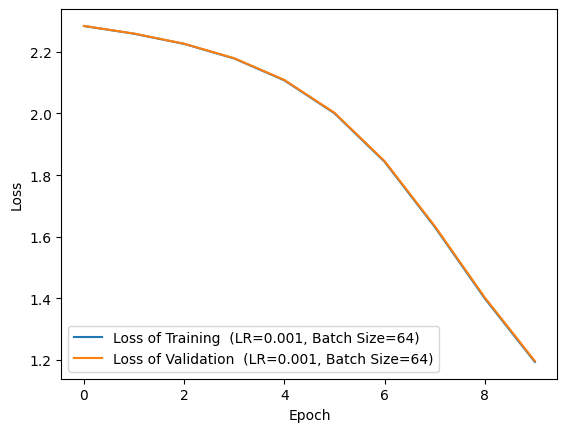

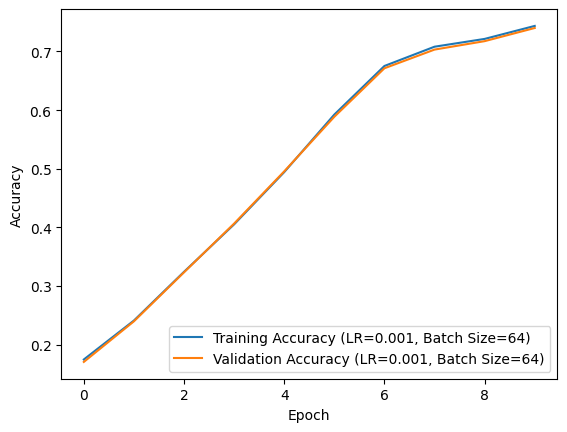


Training with Learning Rate: 0.001, Batch Size: 128
Epoch 1/10, Training Loss is: 2.2974, Training Accuracy is: 0.1332, Validation Loss is: 2.2973, Validation Accuracy is: 0.1329
Epoch 2/10, Training Loss is: 2.2876, Training Accuracy is: 0.1519, Validation Loss is: 2.2876, Validation Accuracy is: 0.1514
Epoch 3/10, Training Loss is: 2.2769, Training Accuracy is: 0.1770, Validation Loss is: 2.2769, Validation Accuracy is: 0.1745
Epoch 4/10, Training Loss is: 2.2645, Training Accuracy is: 0.2434, Validation Loss is: 2.2645, Validation Accuracy is: 0.2432
Epoch 5/10, Training Loss is: 2.2500, Training Accuracy is: 0.3319, Validation Loss is: 2.2500, Validation Accuracy is: 0.3315
Epoch 6/10, Training Loss is: 2.2329, Training Accuracy is: 0.3920, Validation Loss is: 2.2331, Validation Accuracy is: 0.3887
Epoch 7/10, Training Loss is: 2.2126, Training Accuracy is: 0.4264, Validation Loss is: 2.2128, Validation Accuracy is: 0.4238
Epoch 8/10, Training Loss is: 2.1880, Training Accuracy is

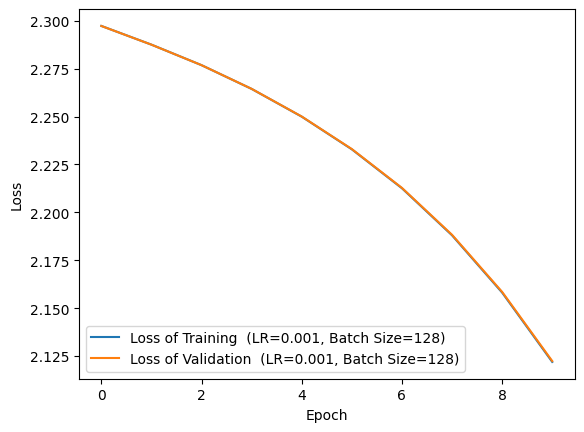

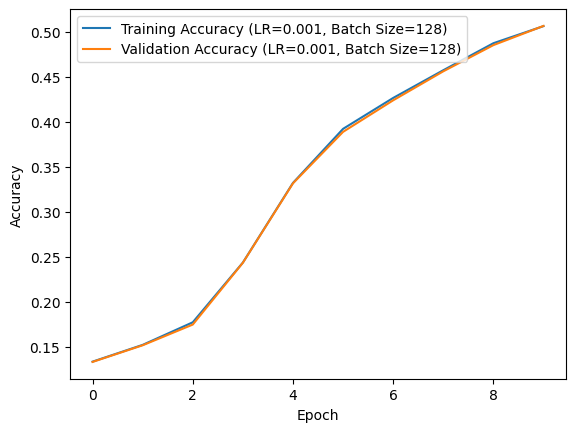


Training with Learning Rate: 0.001, Batch Size: 256
Epoch 1/10, Training Loss is: 2.3010, Training Accuracy is: 0.0908, Validation Loss is: 2.3011, Validation Accuracy is: 0.0889
Epoch 2/10, Training Loss is: 2.2961, Training Accuracy is: 0.1085, Validation Loss is: 2.2962, Validation Accuracy is: 0.1064
Epoch 3/10, Training Loss is: 2.2908, Training Accuracy is: 0.1317, Validation Loss is: 2.2910, Validation Accuracy is: 0.1307
Epoch 4/10, Training Loss is: 2.2852, Training Accuracy is: 0.1682, Validation Loss is: 2.2854, Validation Accuracy is: 0.1700
Epoch 5/10, Training Loss is: 2.2790, Training Accuracy is: 0.2109, Validation Loss is: 2.2792, Validation Accuracy is: 0.2088
Epoch 6/10, Training Loss is: 2.2723, Training Accuracy is: 0.2484, Validation Loss is: 2.2724, Validation Accuracy is: 0.2474
Epoch 7/10, Training Loss is: 2.2647, Training Accuracy is: 0.2782, Validation Loss is: 2.2648, Validation Accuracy is: 0.2806
Epoch 8/10, Training Loss is: 2.2561, Training Accuracy is

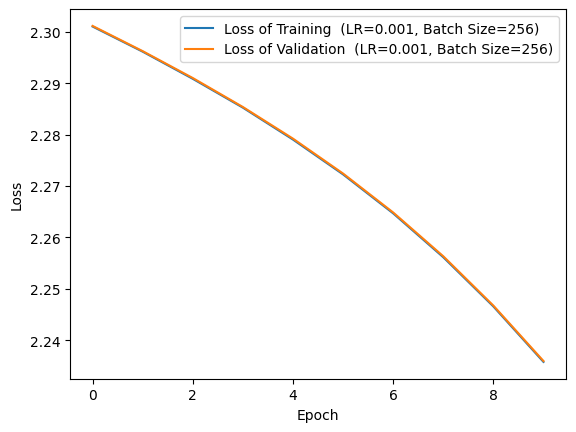

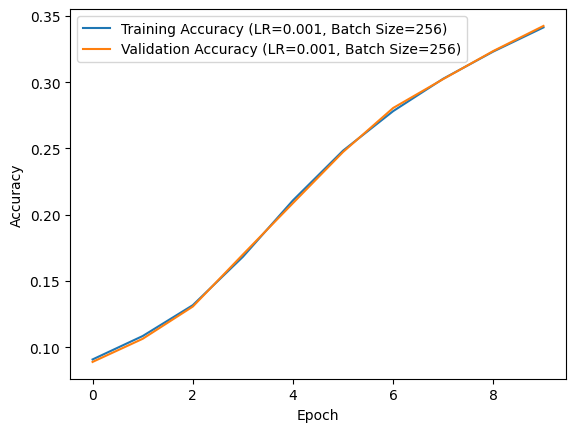


Training with Learning Rate: 0.001, Batch Size: 512
Epoch 1/10, Training Loss is: 2.3019, Training Accuracy is: 0.0932, Validation Loss is: 2.3018, Validation Accuracy is: 0.0920
Epoch 2/10, Training Loss is: 2.2992, Training Accuracy is: 0.1025, Validation Loss is: 2.2991, Validation Accuracy is: 0.1027
Epoch 3/10, Training Loss is: 2.2964, Training Accuracy is: 0.1128, Validation Loss is: 2.2963, Validation Accuracy is: 0.1123
Epoch 4/10, Training Loss is: 2.2936, Training Accuracy is: 0.1234, Validation Loss is: 2.2935, Validation Accuracy is: 0.1228
Epoch 5/10, Training Loss is: 2.2906, Training Accuracy is: 0.1333, Validation Loss is: 2.2905, Validation Accuracy is: 0.1323
Epoch 6/10, Training Loss is: 2.2876, Training Accuracy is: 0.1449, Validation Loss is: 2.2875, Validation Accuracy is: 0.1433
Epoch 7/10, Training Loss is: 2.2845, Training Accuracy is: 0.1555, Validation Loss is: 2.2844, Validation Accuracy is: 0.1541
Epoch 8/10, Training Loss is: 2.2813, Training Accuracy is

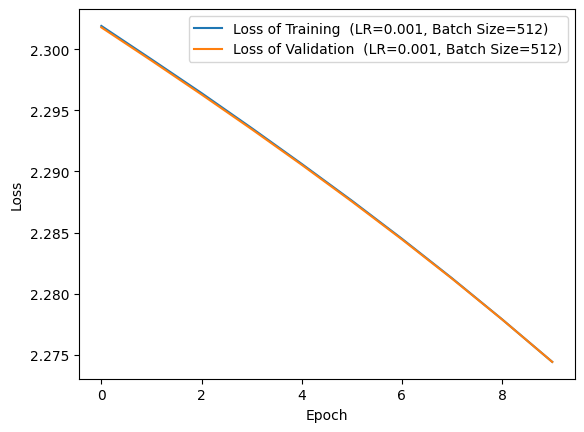

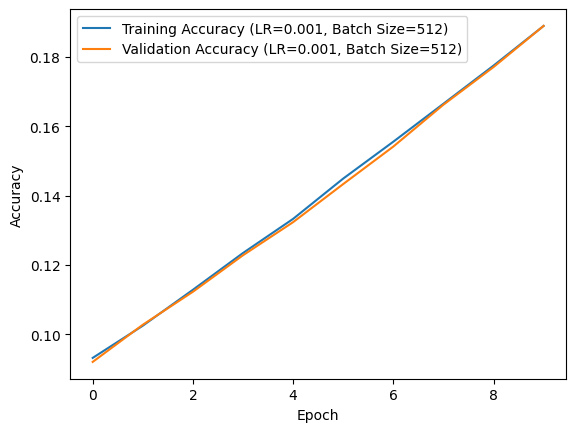


Training with Learning Rate: 0.01, Batch Size: 32
Epoch 1/10, Training Loss is: 0.5198, Training Accuracy is: 0.8550, Validation Loss is: 0.5224, Validation Accuracy is: 0.8558
Epoch 2/10, Training Loss is: 0.3574, Training Accuracy is: 0.8987, Validation Loss is: 0.3637, Validation Accuracy is: 0.8972
Epoch 3/10, Training Loss is: 0.3100, Training Accuracy is: 0.9094, Validation Loss is: 0.3175, Validation Accuracy is: 0.9082
Epoch 4/10, Training Loss is: 0.2725, Training Accuracy is: 0.9221, Validation Loss is: 0.2824, Validation Accuracy is: 0.9194
Epoch 5/10, Training Loss is: 0.2443, Training Accuracy is: 0.9296, Validation Loss is: 0.2558, Validation Accuracy is: 0.9250
Epoch 6/10, Training Loss is: 0.2189, Training Accuracy is: 0.9373, Validation Loss is: 0.2319, Validation Accuracy is: 0.9345
Epoch 7/10, Training Loss is: 0.2005, Training Accuracy is: 0.9423, Validation Loss is: 0.2158, Validation Accuracy is: 0.9377
Epoch 8/10, Training Loss is: 0.1841, Training Accuracy is: 

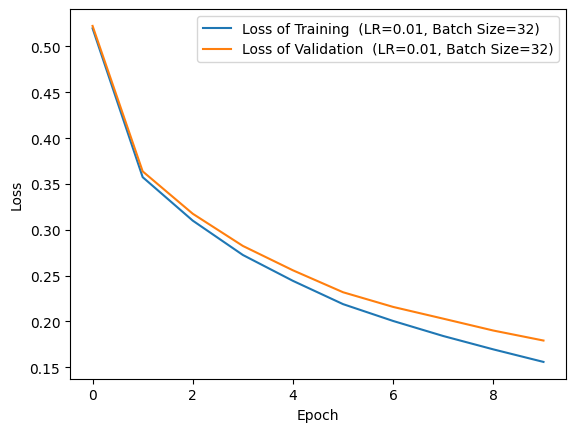

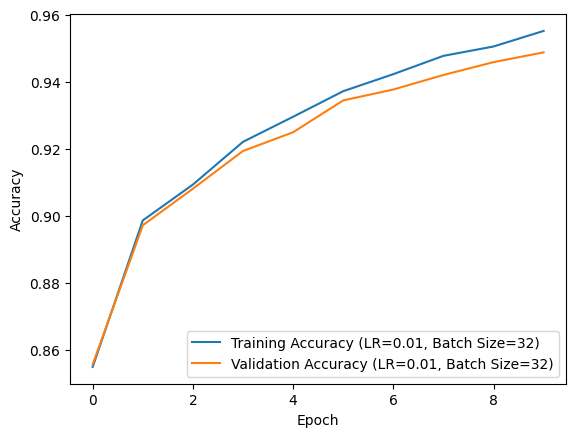


Training with Learning Rate: 0.01, Batch Size: 64
Epoch 1/10, Training Loss is: 1.5038, Training Accuracy is: 0.6745, Validation Loss is: 1.5047, Validation Accuracy is: 0.6741
Epoch 2/10, Training Loss is: 0.5563, Training Accuracy is: 0.8518, Validation Loss is: 0.5550, Validation Accuracy is: 0.8506
Epoch 3/10, Training Loss is: 0.4178, Training Accuracy is: 0.8825, Validation Loss is: 0.4188, Validation Accuracy is: 0.8831
Epoch 4/10, Training Loss is: 0.3665, Training Accuracy is: 0.8977, Validation Loss is: 0.3692, Validation Accuracy is: 0.8968
Epoch 5/10, Training Loss is: 0.3362, Training Accuracy is: 0.9046, Validation Loss is: 0.3406, Validation Accuracy is: 0.9038
Epoch 6/10, Training Loss is: 0.3132, Training Accuracy is: 0.9110, Validation Loss is: 0.3198, Validation Accuracy is: 0.9090
Epoch 7/10, Training Loss is: 0.2963, Training Accuracy is: 0.9163, Validation Loss is: 0.3028, Validation Accuracy is: 0.9145
Epoch 8/10, Training Loss is: 0.2828, Training Accuracy is: 

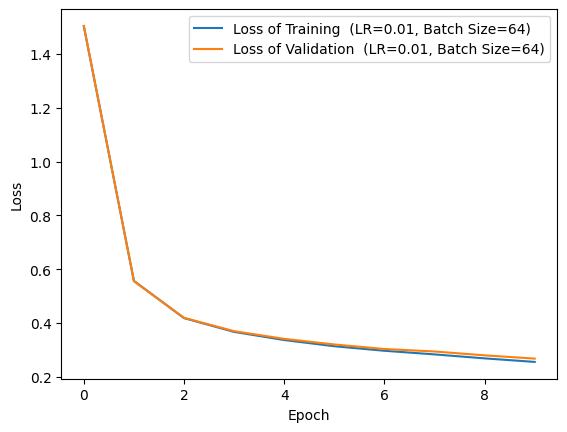

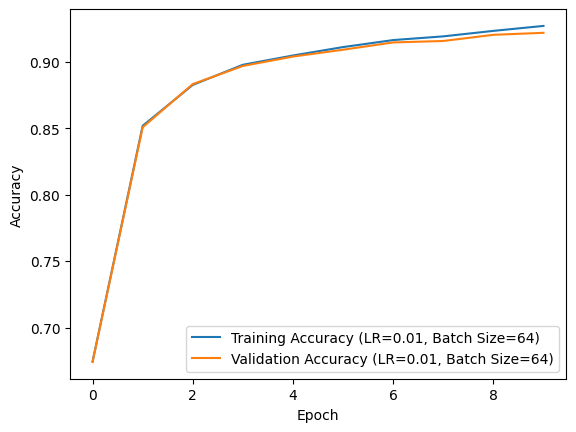


Training with Learning Rate: 0.01, Batch Size: 128
Epoch 1/10, Training Loss is: 2.1050, Training Accuracy is: 0.5759, Validation Loss is: 2.1059, Validation Accuracy is: 0.5739
Epoch 2/10, Training Loss is: 1.2299, Training Accuracy is: 0.7331, Validation Loss is: 1.2321, Validation Accuracy is: 0.7353
Epoch 3/10, Training Loss is: 0.7278, Training Accuracy is: 0.8104, Validation Loss is: 0.7283, Validation Accuracy is: 0.8133
Epoch 4/10, Training Loss is: 0.5516, Training Accuracy is: 0.8526, Validation Loss is: 0.5528, Validation Accuracy is: 0.8577
Epoch 5/10, Training Loss is: 0.4667, Training Accuracy is: 0.8733, Validation Loss is: 0.4674, Validation Accuracy is: 0.8731
Epoch 6/10, Training Loss is: 0.4170, Training Accuracy is: 0.8851, Validation Loss is: 0.4193, Validation Accuracy is: 0.8853
Epoch 7/10, Training Loss is: 0.3857, Training Accuracy is: 0.8924, Validation Loss is: 0.3887, Validation Accuracy is: 0.8928
Epoch 8/10, Training Loss is: 0.3629, Training Accuracy is:

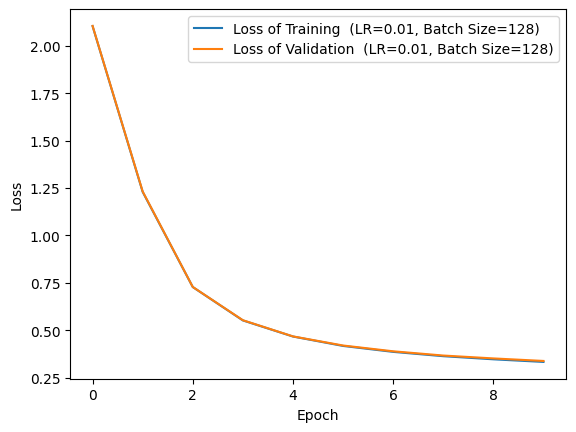

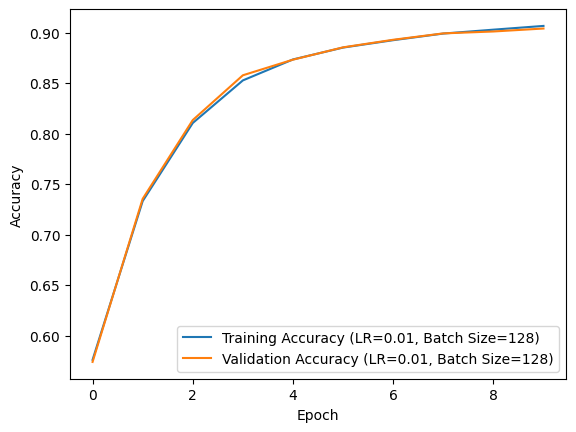


Training with Learning Rate: 0.01, Batch Size: 256
Epoch 1/10, Training Loss is: 2.2365, Training Accuracy is: 0.3484, Validation Loss is: 2.2364, Validation Accuracy is: 0.3476
Epoch 2/10, Training Loss is: 2.0633, Training Accuracy is: 0.5199, Validation Loss is: 2.0635, Validation Accuracy is: 0.5239
Epoch 3/10, Training Loss is: 1.6559, Training Accuracy is: 0.6550, Validation Loss is: 1.6569, Validation Accuracy is: 0.6555
Epoch 4/10, Training Loss is: 1.1581, Training Accuracy is: 0.7534, Validation Loss is: 1.1599, Validation Accuracy is: 0.7505
Epoch 5/10, Training Loss is: 0.8599, Training Accuracy is: 0.7936, Validation Loss is: 0.8612, Validation Accuracy is: 0.7963
Epoch 6/10, Training Loss is: 0.6974, Training Accuracy is: 0.8140, Validation Loss is: 0.7003, Validation Accuracy is: 0.8152
Epoch 7/10, Training Loss is: 0.5971, Training Accuracy is: 0.8406, Validation Loss is: 0.5999, Validation Accuracy is: 0.8418
Epoch 8/10, Training Loss is: 0.5319, Training Accuracy is:

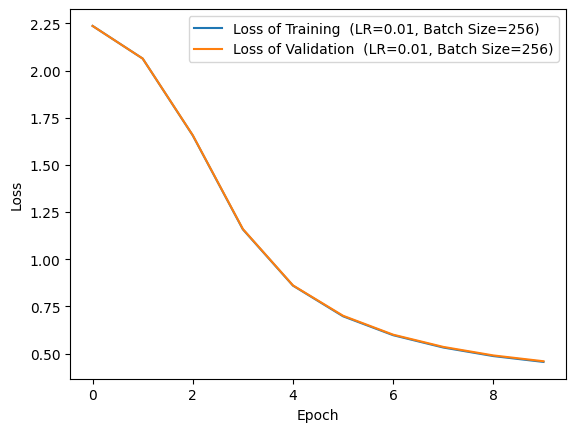

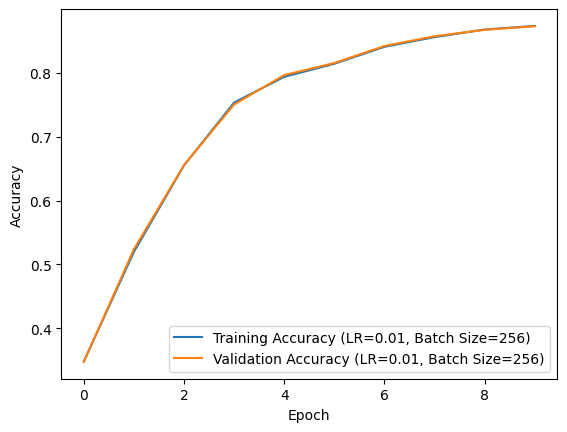


Training with Learning Rate: 0.01, Batch Size: 512
Epoch 1/10, Training Loss is: 2.2782, Training Accuracy is: 0.1941, Validation Loss is: 2.2784, Validation Accuracy is: 0.1926
Epoch 2/10, Training Loss is: 2.2408, Training Accuracy is: 0.2401, Validation Loss is: 2.2412, Validation Accuracy is: 0.2370
Epoch 3/10, Training Loss is: 2.1804, Training Accuracy is: 0.3924, Validation Loss is: 2.1810, Validation Accuracy is: 0.3930
Epoch 4/10, Training Loss is: 2.0785, Training Accuracy is: 0.4385, Validation Loss is: 2.0796, Validation Accuracy is: 0.4396
Epoch 5/10, Training Loss is: 1.9135, Training Accuracy is: 0.4821, Validation Loss is: 1.9153, Validation Accuracy is: 0.4834
Epoch 6/10, Training Loss is: 1.6742, Training Accuracy is: 0.5780, Validation Loss is: 1.6769, Validation Accuracy is: 0.5785
Epoch 7/10, Training Loss is: 1.3913, Training Accuracy is: 0.6907, Validation Loss is: 1.3950, Validation Accuracy is: 0.6936
Epoch 8/10, Training Loss is: 1.1323, Training Accuracy is:

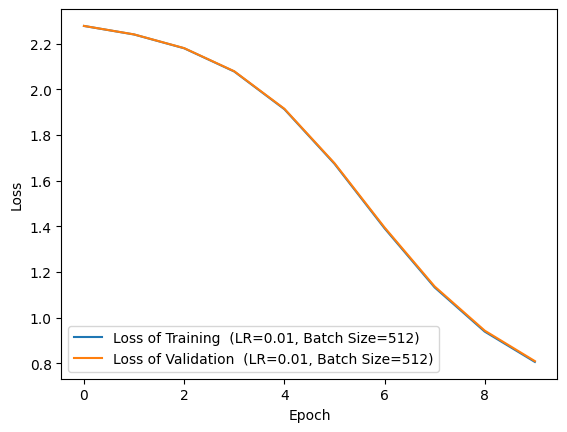

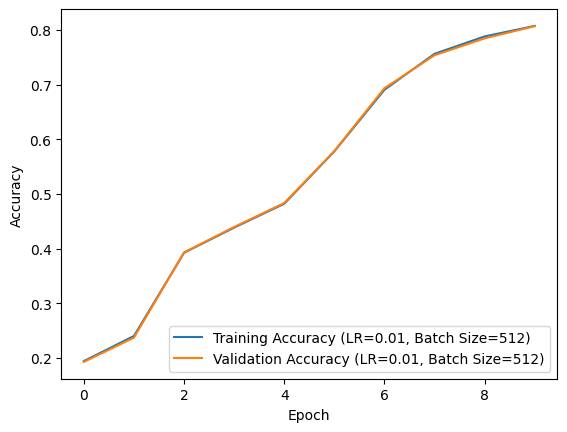


Training with Learning Rate: 0.1, Batch Size: 32
Epoch 1/10, Training Loss is: 0.1860, Training Accuracy is: 0.9445, Validation Loss is: 0.1997, Validation Accuracy is: 0.9393
Epoch 2/10, Training Loss is: 0.1303, Training Accuracy is: 0.9604, Validation Loss is: 0.1577, Validation Accuracy is: 0.9503
Epoch 3/10, Training Loss is: 0.0793, Training Accuracy is: 0.9762, Validation Loss is: 0.1158, Validation Accuracy is: 0.9647
Epoch 4/10, Training Loss is: 0.0595, Training Accuracy is: 0.9814, Validation Loss is: 0.1001, Validation Accuracy is: 0.9701
Epoch 5/10, Training Loss is: 0.0478, Training Accuracy is: 0.9856, Validation Loss is: 0.0963, Validation Accuracy is: 0.9711
Epoch 6/10, Training Loss is: 0.0380, Training Accuracy is: 0.9886, Validation Loss is: 0.0900, Validation Accuracy is: 0.9739
Epoch 7/10, Training Loss is: 0.0377, Training Accuracy is: 0.9878, Validation Loss is: 0.0997, Validation Accuracy is: 0.9710
Epoch 8/10, Training Loss is: 0.0279, Training Accuracy is: 0

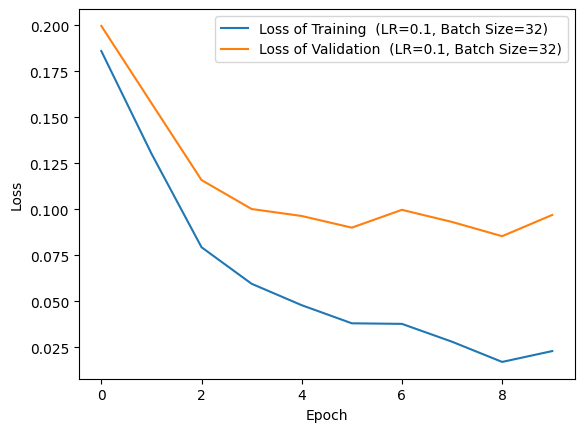

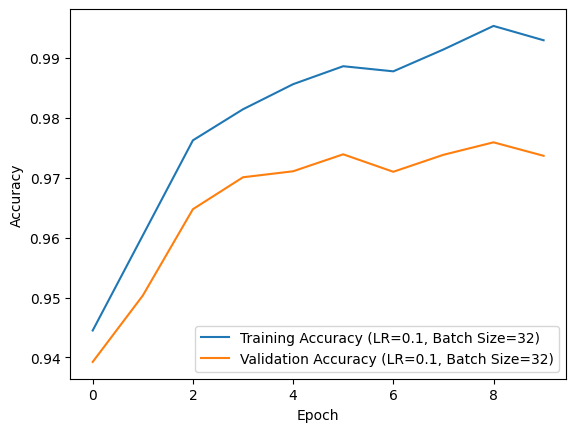


Training with Learning Rate: 0.1, Batch Size: 64
Epoch 1/10, Training Loss is: 0.2729, Training Accuracy is: 0.9189, Validation Loss is: 0.2823, Validation Accuracy is: 0.9174
Epoch 2/10, Training Loss is: 0.1981, Training Accuracy is: 0.9413, Validation Loss is: 0.2217, Validation Accuracy is: 0.9351
Epoch 3/10, Training Loss is: 0.1268, Training Accuracy is: 0.9618, Validation Loss is: 0.1494, Validation Accuracy is: 0.9545
Epoch 4/10, Training Loss is: 0.0943, Training Accuracy is: 0.9730, Validation Loss is: 0.1221, Validation Accuracy is: 0.9639
Epoch 5/10, Training Loss is: 0.0751, Training Accuracy is: 0.9784, Validation Loss is: 0.1082, Validation Accuracy is: 0.9686
Epoch 6/10, Training Loss is: 0.0704, Training Accuracy is: 0.9785, Validation Loss is: 0.1062, Validation Accuracy is: 0.9689
Epoch 7/10, Training Loss is: 0.0537, Training Accuracy is: 0.9841, Validation Loss is: 0.0985, Validation Accuracy is: 0.9701
Epoch 8/10, Training Loss is: 0.0451, Training Accuracy is: 0

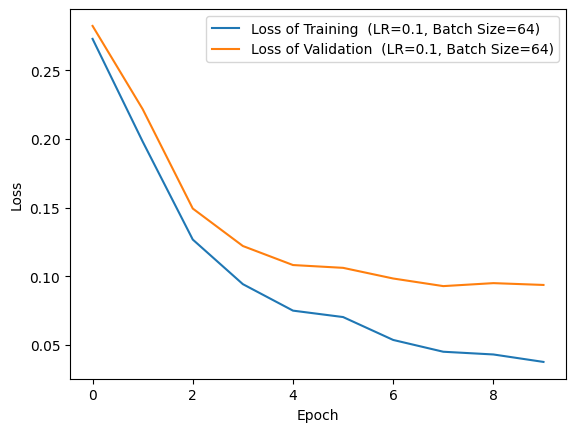

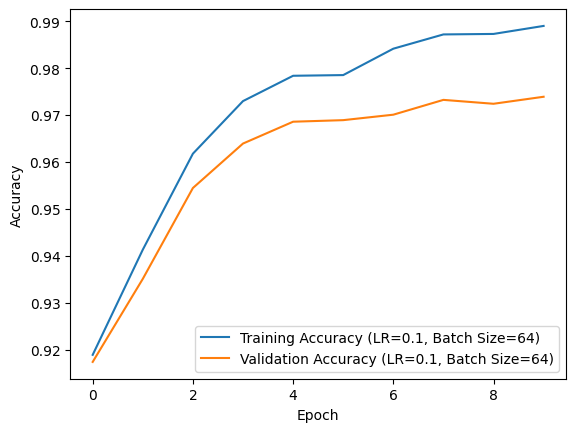


Training with Learning Rate: 0.1, Batch Size: 128
Epoch 1/10, Training Loss is: 0.3446, Training Accuracy is: 0.9006, Validation Loss is: 0.3452, Validation Accuracy is: 0.9019
Epoch 2/10, Training Loss is: 0.2507, Training Accuracy is: 0.9273, Validation Loss is: 0.2616, Validation Accuracy is: 0.9226
Epoch 3/10, Training Loss is: 0.1996, Training Accuracy is: 0.9431, Validation Loss is: 0.2169, Validation Accuracy is: 0.9384
Epoch 4/10, Training Loss is: 0.1587, Training Accuracy is: 0.9543, Validation Loss is: 0.1803, Validation Accuracy is: 0.9484
Epoch 5/10, Training Loss is: 0.1317, Training Accuracy is: 0.9625, Validation Loss is: 0.1559, Validation Accuracy is: 0.9548
Epoch 6/10, Training Loss is: 0.1187, Training Accuracy is: 0.9659, Validation Loss is: 0.1485, Validation Accuracy is: 0.9579
Epoch 7/10, Training Loss is: 0.1039, Training Accuracy is: 0.9699, Validation Loss is: 0.1356, Validation Accuracy is: 0.9609
Epoch 8/10, Training Loss is: 0.0871, Training Accuracy is: 

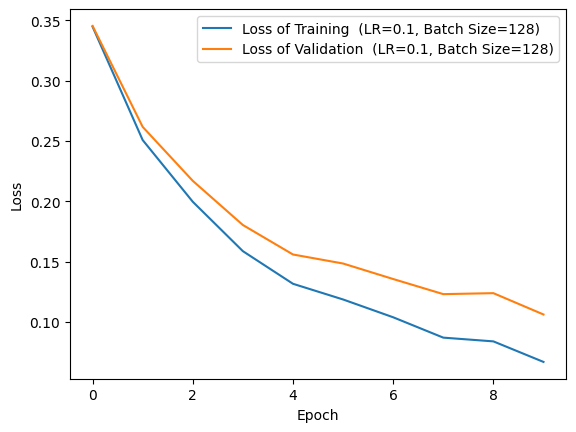

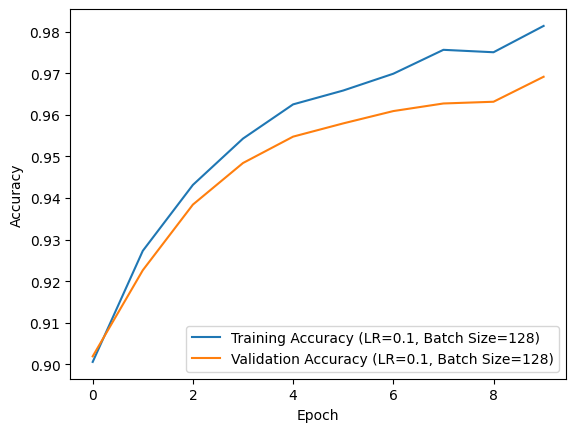


Training with Learning Rate: 0.1, Batch Size: 256
Epoch 1/10, Training Loss is: 0.4715, Training Accuracy is: 0.8567, Validation Loss is: 0.4763, Validation Accuracy is: 0.8530
Epoch 2/10, Training Loss is: 0.3845, Training Accuracy is: 0.8811, Validation Loss is: 0.3879, Validation Accuracy is: 0.8782
Epoch 3/10, Training Loss is: 0.2878, Training Accuracy is: 0.9166, Validation Loss is: 0.2951, Validation Accuracy is: 0.9141
Epoch 4/10, Training Loss is: 0.2449, Training Accuracy is: 0.9301, Validation Loss is: 0.2568, Validation Accuracy is: 0.9267
Epoch 5/10, Training Loss is: 0.2384, Training Accuracy is: 0.9288, Validation Loss is: 0.2536, Validation Accuracy is: 0.9244
Epoch 6/10, Training Loss is: 0.2032, Training Accuracy is: 0.9408, Validation Loss is: 0.2165, Validation Accuracy is: 0.9364
Epoch 7/10, Training Loss is: 0.1901, Training Accuracy is: 0.9439, Validation Loss is: 0.2072, Validation Accuracy is: 0.9388
Epoch 8/10, Training Loss is: 0.1767, Training Accuracy is: 

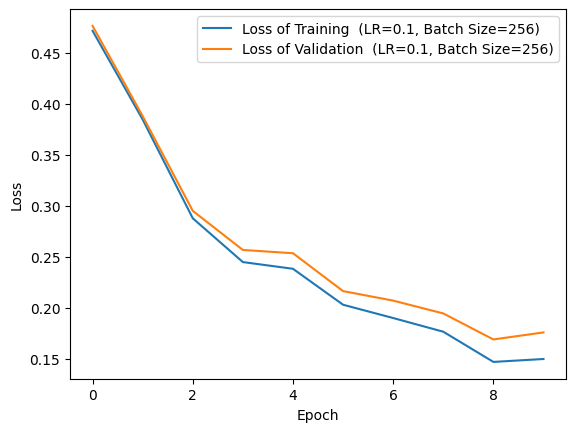

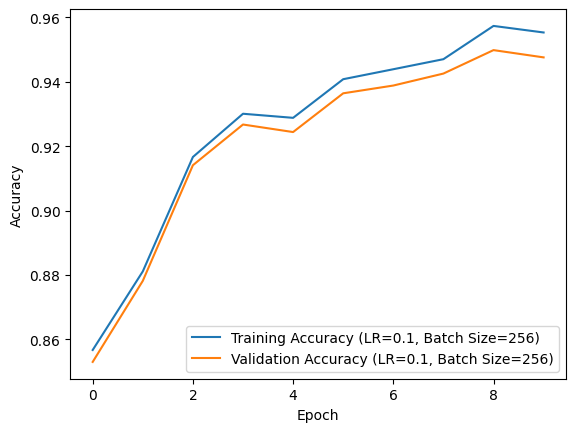


Training with Learning Rate: 0.1, Batch Size: 512
Epoch 1/10, Training Loss is: 0.8682, Training Accuracy is: 0.7929, Validation Loss is: 0.8707, Validation Accuracy is: 0.7921
Epoch 2/10, Training Loss is: 0.4586, Training Accuracy is: 0.8704, Validation Loss is: 0.4615, Validation Accuracy is: 0.8659
Epoch 3/10, Training Loss is: 0.3767, Training Accuracy is: 0.8904, Validation Loss is: 0.3801, Validation Accuracy is: 0.8875
Epoch 4/10, Training Loss is: 0.3290, Training Accuracy is: 0.9051, Validation Loss is: 0.3349, Validation Accuracy is: 0.9032
Epoch 5/10, Training Loss is: 0.3024, Training Accuracy is: 0.9126, Validation Loss is: 0.3084, Validation Accuracy is: 0.9121
Epoch 6/10, Training Loss is: 0.2828, Training Accuracy is: 0.9172, Validation Loss is: 0.2926, Validation Accuracy is: 0.9134
Epoch 7/10, Training Loss is: 0.2670, Training Accuracy is: 0.9219, Validation Loss is: 0.2761, Validation Accuracy is: 0.9177
Epoch 8/10, Training Loss is: 0.2466, Training Accuracy is: 

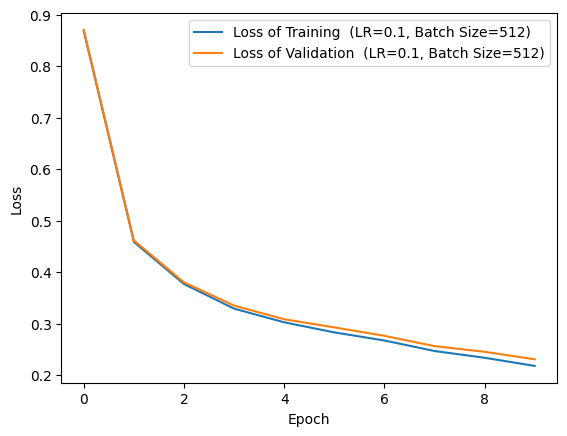

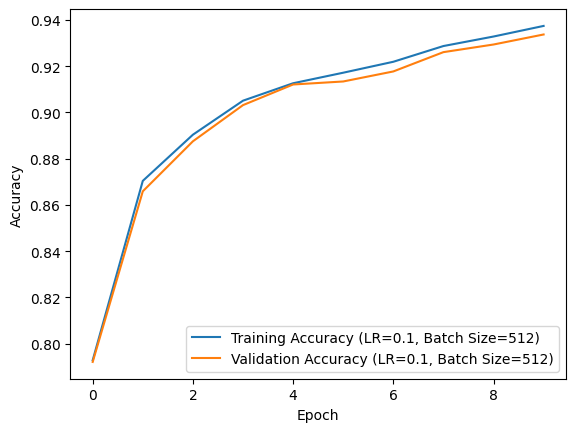


Training with Learning Rate: 0.5, Batch Size: 32
Epoch 1/10, Training Loss is: 0.1988, Training Accuracy is: 0.9382, Validation Loss is: 0.2208, Validation Accuracy is: 0.9305
Epoch 2/10, Training Loss is: 0.0886, Training Accuracy is: 0.9729, Validation Loss is: 0.1234, Validation Accuracy is: 0.9627
Epoch 3/10, Training Loss is: 0.0926, Training Accuracy is: 0.9702, Validation Loss is: 0.1473, Validation Accuracy is: 0.9602
Epoch 4/10, Training Loss is: 0.0816, Training Accuracy is: 0.9759, Validation Loss is: 0.1492, Validation Accuracy is: 0.9626
Epoch 5/10, Training Loss is: 0.0679, Training Accuracy is: 0.9796, Validation Loss is: 0.1332, Validation Accuracy is: 0.9669
Epoch 6/10, Training Loss is: 0.0336, Training Accuracy is: 0.9894, Validation Loss is: 0.1080, Validation Accuracy is: 0.9728
Epoch 7/10, Training Loss is: 0.0416, Training Accuracy is: 0.9864, Validation Loss is: 0.1295, Validation Accuracy is: 0.9702
Epoch 8/10, Training Loss is: 0.0340, Training Accuracy is: 0

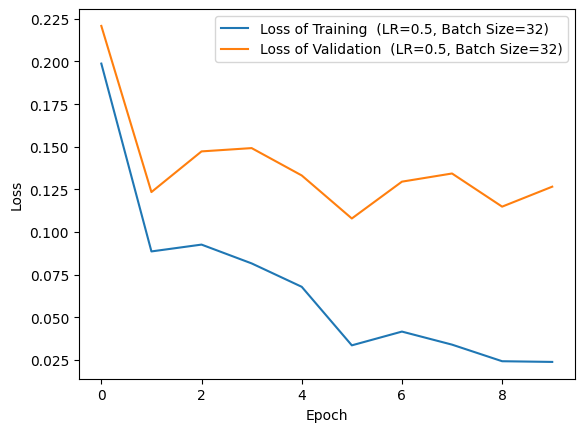

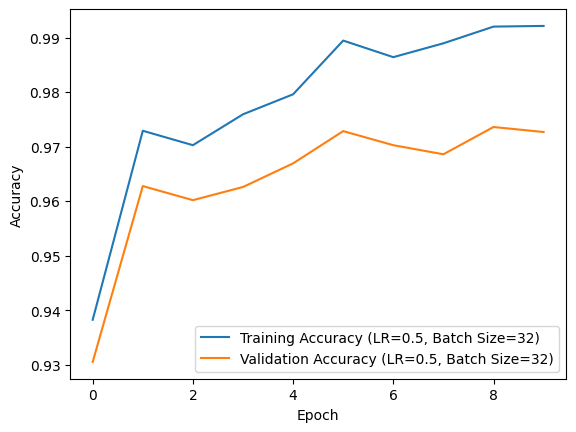


Training with Learning Rate: 0.5, Batch Size: 64
Epoch 1/10, Training Loss is: 0.1344, Training Accuracy is: 0.9581, Validation Loss is: 0.1549, Validation Accuracy is: 0.9535
Epoch 2/10, Training Loss is: 0.0968, Training Accuracy is: 0.9693, Validation Loss is: 0.1244, Validation Accuracy is: 0.9618
Epoch 3/10, Training Loss is: 0.0640, Training Accuracy is: 0.9800, Validation Loss is: 0.1028, Validation Accuracy is: 0.9693
Epoch 4/10, Training Loss is: 0.0468, Training Accuracy is: 0.9858, Validation Loss is: 0.0948, Validation Accuracy is: 0.9717
Epoch 5/10, Training Loss is: 0.0440, Training Accuracy is: 0.9864, Validation Loss is: 0.1058, Validation Accuracy is: 0.9712
Epoch 6/10, Training Loss is: 0.0332, Training Accuracy is: 0.9890, Validation Loss is: 0.0997, Validation Accuracy is: 0.9719
Epoch 7/10, Training Loss is: 0.0232, Training Accuracy is: 0.9923, Validation Loss is: 0.1003, Validation Accuracy is: 0.9749
Epoch 8/10, Training Loss is: 0.0286, Training Accuracy is: 0

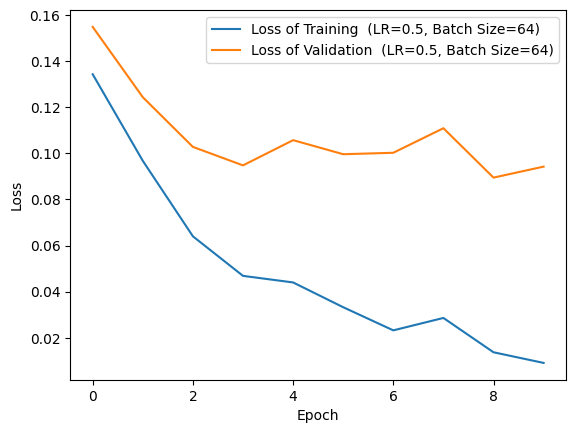

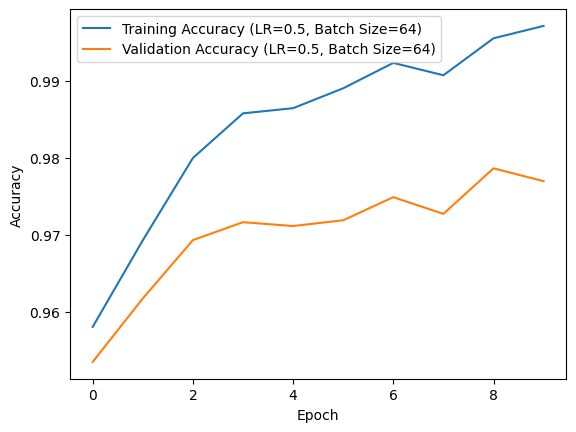


Training with Learning Rate: 0.5, Batch Size: 128
Epoch 1/10, Training Loss is: 0.1886, Training Accuracy is: 0.9409, Validation Loss is: 0.2112, Validation Accuracy is: 0.9345
Epoch 2/10, Training Loss is: 0.0876, Training Accuracy is: 0.9741, Validation Loss is: 0.1154, Validation Accuracy is: 0.9651
Epoch 3/10, Training Loss is: 0.0627, Training Accuracy is: 0.9806, Validation Loss is: 0.0975, Validation Accuracy is: 0.9716
Epoch 4/10, Training Loss is: 0.0539, Training Accuracy is: 0.9831, Validation Loss is: 0.0972, Validation Accuracy is: 0.9691
Epoch 5/10, Training Loss is: 0.0460, Training Accuracy is: 0.9854, Validation Loss is: 0.1002, Validation Accuracy is: 0.9707
Epoch 6/10, Training Loss is: 0.0508, Training Accuracy is: 0.9831, Validation Loss is: 0.1037, Validation Accuracy is: 0.9694
Epoch 7/10, Training Loss is: 0.0328, Training Accuracy is: 0.9895, Validation Loss is: 0.0859, Validation Accuracy is: 0.9754
Epoch 8/10, Training Loss is: 0.0223, Training Accuracy is: 

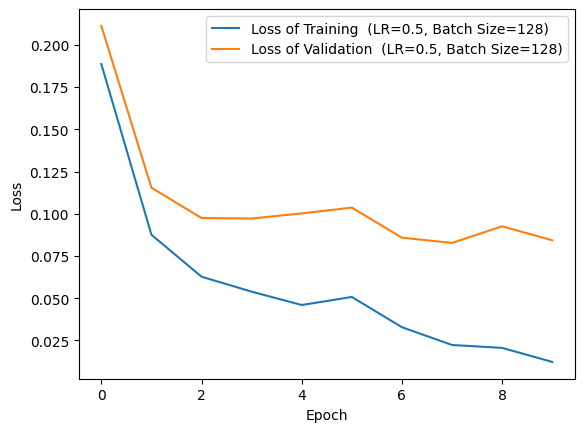

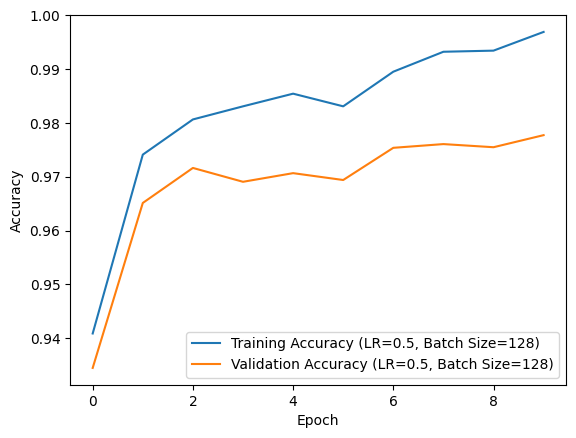


Training with Learning Rate: 0.5, Batch Size: 256
Epoch 1/10, Training Loss is: 0.2413, Training Accuracy is: 0.9252, Validation Loss is: 0.2504, Validation Accuracy is: 0.9202
Epoch 2/10, Training Loss is: 0.1358, Training Accuracy is: 0.9590, Validation Loss is: 0.1567, Validation Accuracy is: 0.9520
Epoch 3/10, Training Loss is: 0.0990, Training Accuracy is: 0.9704, Validation Loss is: 0.1255, Validation Accuracy is: 0.9624
Epoch 4/10, Training Loss is: 0.1164, Training Accuracy is: 0.9625, Validation Loss is: 0.1418, Validation Accuracy is: 0.9546
Epoch 5/10, Training Loss is: 0.0844, Training Accuracy is: 0.9728, Validation Loss is: 0.1208, Validation Accuracy is: 0.9645
Epoch 6/10, Training Loss is: 0.0515, Training Accuracy is: 0.9845, Validation Loss is: 0.0962, Validation Accuracy is: 0.9715
Epoch 7/10, Training Loss is: 0.0485, Training Accuracy is: 0.9853, Validation Loss is: 0.0976, Validation Accuracy is: 0.9698
Epoch 8/10, Training Loss is: 0.0343, Training Accuracy is: 

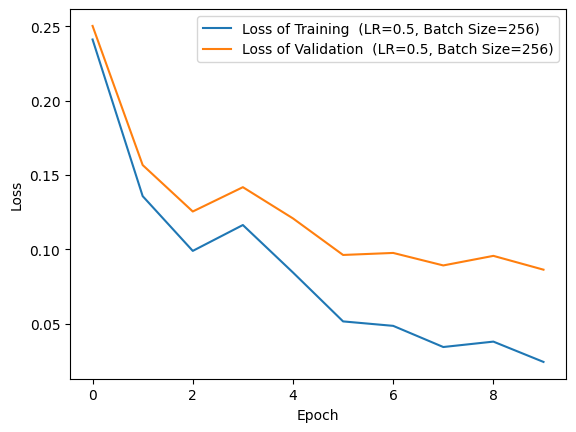

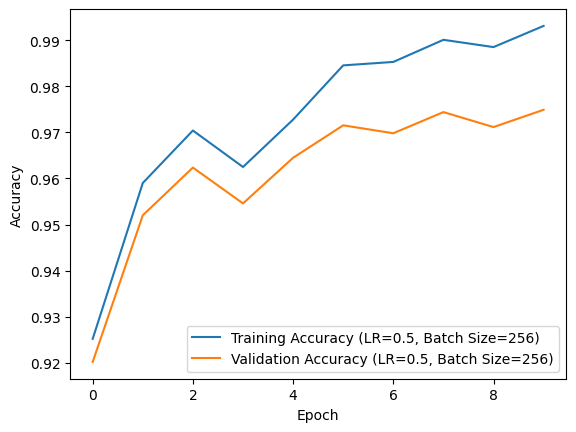


Training with Learning Rate: 0.5, Batch Size: 512
Epoch 1/10, Training Loss is: 0.3514, Training Accuracy is: 0.8943, Validation Loss is: 0.3522, Validation Accuracy is: 0.8942
Epoch 2/10, Training Loss is: 0.2398, Training Accuracy is: 0.9254, Validation Loss is: 0.2496, Validation Accuracy is: 0.9207
Epoch 3/10, Training Loss is: 0.1583, Training Accuracy is: 0.9531, Validation Loss is: 0.1735, Validation Accuracy is: 0.9491
Epoch 4/10, Training Loss is: 0.1235, Training Accuracy is: 0.9644, Validation Loss is: 0.1459, Validation Accuracy is: 0.9579
Epoch 5/10, Training Loss is: 0.1065, Training Accuracy is: 0.9685, Validation Loss is: 0.1331, Validation Accuracy is: 0.9600
Epoch 6/10, Training Loss is: 0.1199, Training Accuracy is: 0.9627, Validation Loss is: 0.1536, Validation Accuracy is: 0.9551
Epoch 7/10, Training Loss is: 0.0769, Training Accuracy is: 0.9766, Validation Loss is: 0.1092, Validation Accuracy is: 0.9670
Epoch 8/10, Training Loss is: 0.0633, Training Accuracy is: 

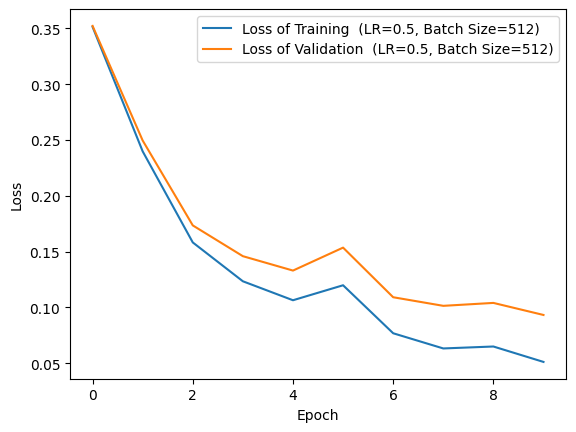

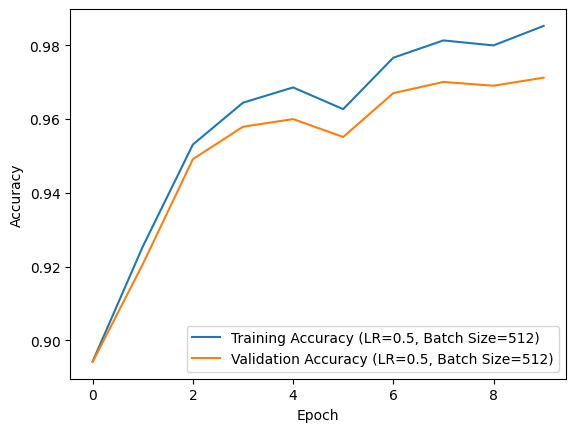


Training with Learning Rate: 1.0, Batch Size: 32
Epoch 1/10, Training Loss is: 0.8108, Training Accuracy is: 0.6922, Validation Loss is: 0.8209, Validation Accuracy is: 0.6856
Epoch 2/10, Training Loss is: 0.9711, Training Accuracy is: 0.6200, Validation Loss is: 0.9891, Validation Accuracy is: 0.6181
Epoch 3/10, Training Loss is: 0.9787, Training Accuracy is: 0.6498, Validation Loss is: 0.9791, Validation Accuracy is: 0.6533
Epoch 4/10, Training Loss is: 1.8299, Training Accuracy is: 0.2694, Validation Loss is: 1.8419, Validation Accuracy is: 0.2672
Epoch 5/10, Training Loss is: 1.4752, Training Accuracy is: 0.3494, Validation Loss is: 1.4840, Validation Accuracy is: 0.3482
Epoch 6/10, Training Loss is: 1.4818, Training Accuracy is: 0.3413, Validation Loss is: 1.4856, Validation Accuracy is: 0.3415
Epoch 7/10, Training Loss is: 1.4842, Training Accuracy is: 0.3603, Validation Loss is: 1.5085, Validation Accuracy is: 0.3551
Epoch 8/10, Training Loss is: 1.3932, Training Accuracy is: 0

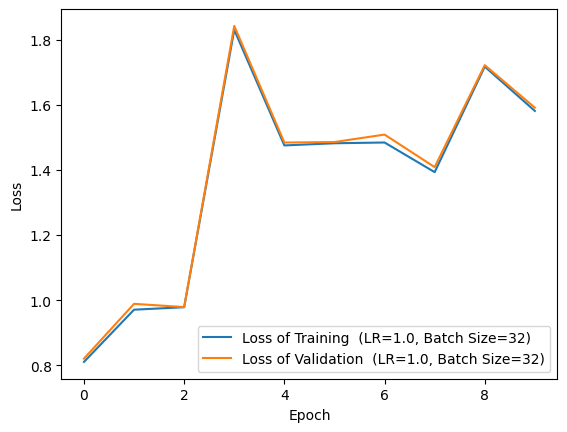

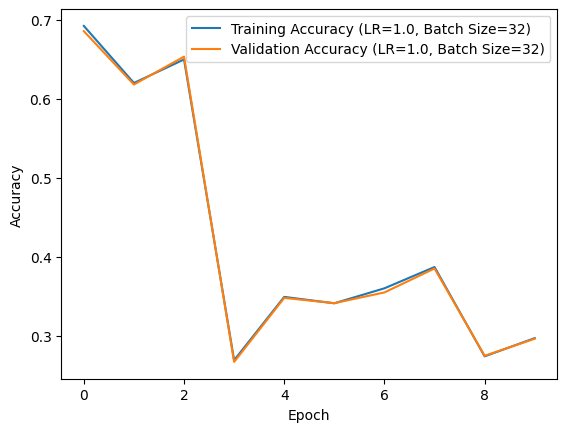


Training with Learning Rate: 1.0, Batch Size: 64
Epoch 1/10, Training Loss is: 0.1788, Training Accuracy is: 0.9460, Validation Loss is: 0.2013, Validation Accuracy is: 0.9402
Epoch 2/10, Training Loss is: 0.1343, Training Accuracy is: 0.9577, Validation Loss is: 0.1623, Validation Accuracy is: 0.9505
Epoch 3/10, Training Loss is: 0.1179, Training Accuracy is: 0.9625, Validation Loss is: 0.1640, Validation Accuracy is: 0.9525
Epoch 4/10, Training Loss is: 0.0814, Training Accuracy is: 0.9745, Validation Loss is: 0.1328, Validation Accuracy is: 0.9633
Epoch 5/10, Training Loss is: 0.0875, Training Accuracy is: 0.9734, Validation Loss is: 0.1439, Validation Accuracy is: 0.9606
Epoch 6/10, Training Loss is: 0.0771, Training Accuracy is: 0.9764, Validation Loss is: 0.1375, Validation Accuracy is: 0.9641
Epoch 7/10, Training Loss is: 0.0681, Training Accuracy is: 0.9801, Validation Loss is: 0.1414, Validation Accuracy is: 0.9655
Epoch 8/10, Training Loss is: 0.0835, Training Accuracy is: 0

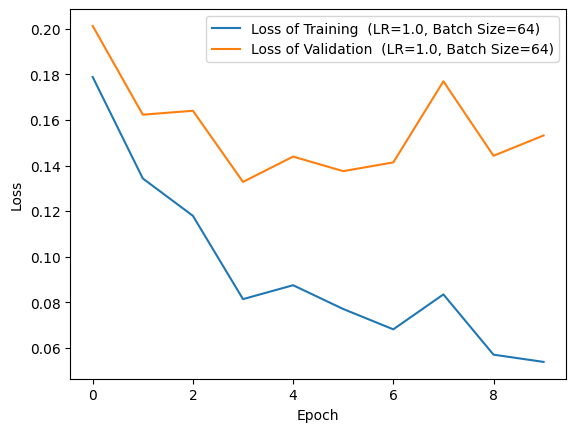

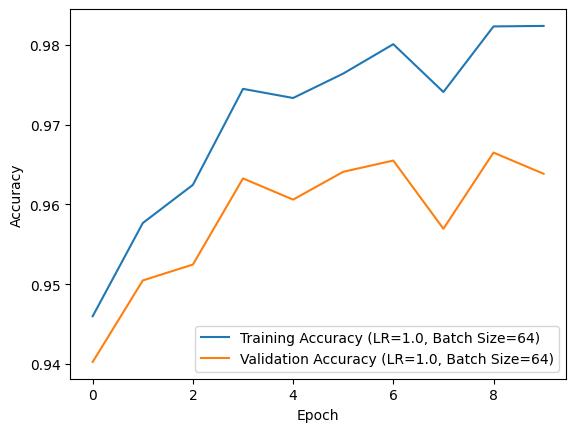


Training with Learning Rate: 1.0, Batch Size: 128
Epoch 1/10, Training Loss is: 0.1939, Training Accuracy is: 0.9432, Validation Loss is: 0.2110, Validation Accuracy is: 0.9394
Epoch 2/10, Training Loss is: 0.1281, Training Accuracy is: 0.9604, Validation Loss is: 0.1555, Validation Accuracy is: 0.9531
Epoch 3/10, Training Loss is: 0.0968, Training Accuracy is: 0.9711, Validation Loss is: 0.1368, Validation Accuracy is: 0.9591
Epoch 4/10, Training Loss is: 0.0932, Training Accuracy is: 0.9708, Validation Loss is: 0.1394, Validation Accuracy is: 0.9592
Epoch 5/10, Training Loss is: 0.0646, Training Accuracy is: 0.9801, Validation Loss is: 0.1118, Validation Accuracy is: 0.9658
Epoch 6/10, Training Loss is: 0.0764, Training Accuracy is: 0.9756, Validation Loss is: 0.1318, Validation Accuracy is: 0.9611
Epoch 7/10, Training Loss is: 0.0583, Training Accuracy is: 0.9808, Validation Loss is: 0.1375, Validation Accuracy is: 0.9621
Epoch 8/10, Training Loss is: 0.0438, Training Accuracy is: 

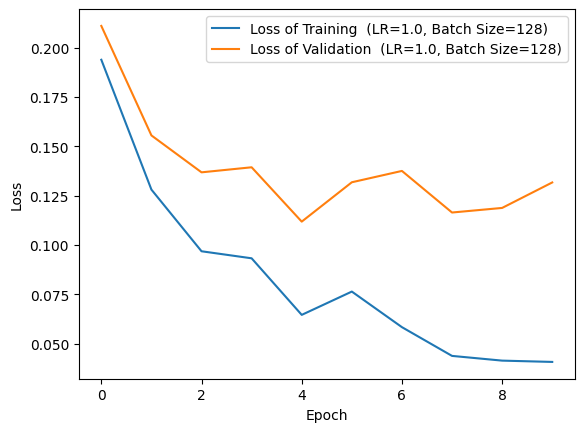

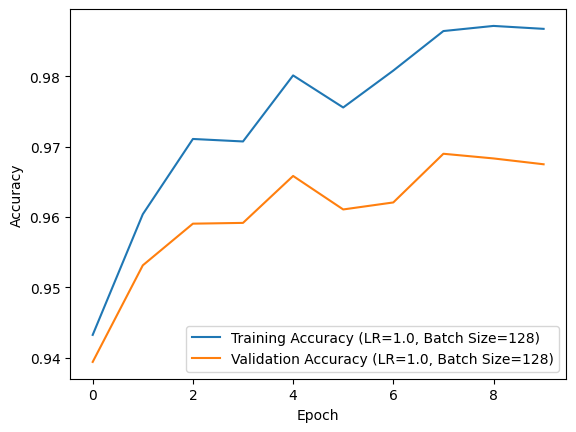


Training with Learning Rate: 1.0, Batch Size: 256
Epoch 1/10, Training Loss is: 0.3332, Training Accuracy is: 0.9003, Validation Loss is: 0.3297, Validation Accuracy is: 0.8991
Epoch 2/10, Training Loss is: 0.4942, Training Accuracy is: 0.8267, Validation Loss is: 0.5070, Validation Accuracy is: 0.8246
Epoch 3/10, Training Loss is: 0.1965, Training Accuracy is: 0.9405, Validation Loss is: 0.2224, Validation Accuracy is: 0.9337
Epoch 4/10, Training Loss is: 0.1186, Training Accuracy is: 0.9630, Validation Loss is: 0.1460, Validation Accuracy is: 0.9551
Epoch 5/10, Training Loss is: 0.1249, Training Accuracy is: 0.9621, Validation Loss is: 0.1573, Validation Accuracy is: 0.9527
Epoch 6/10, Training Loss is: 0.1123, Training Accuracy is: 0.9647, Validation Loss is: 0.1588, Validation Accuracy is: 0.9536
Epoch 7/10, Training Loss is: 0.0960, Training Accuracy is: 0.9699, Validation Loss is: 0.1405, Validation Accuracy is: 0.9593
Epoch 8/10, Training Loss is: 0.0956, Training Accuracy is: 

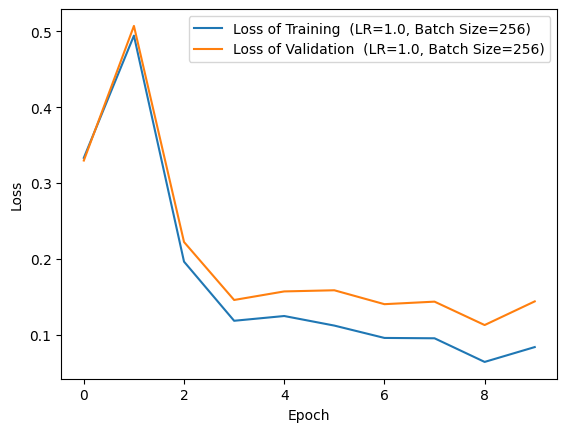

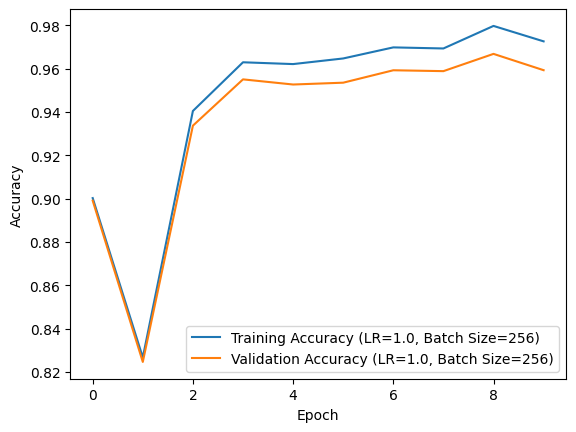


Training with Learning Rate: 1.0, Batch Size: 512
Epoch 1/10, Training Loss is: 0.9883, Training Accuracy is: 0.6868, Validation Loss is: 0.9951, Validation Accuracy is: 0.6842
Epoch 2/10, Training Loss is: 0.9375, Training Accuracy is: 0.7495, Validation Loss is: 0.9657, Validation Accuracy is: 0.7392
Epoch 3/10, Training Loss is: 0.2244, Training Accuracy is: 0.9332, Validation Loss is: 0.2379, Validation Accuracy is: 0.9270
Epoch 4/10, Training Loss is: 2.4010, Training Accuracy is: 0.4464, Validation Loss is: 2.4117, Validation Accuracy is: 0.4448
Epoch 5/10, Training Loss is: 0.6343, Training Accuracy is: 0.7955, Validation Loss is: 0.6359, Validation Accuracy is: 0.7985
Epoch 6/10, Training Loss is: 0.4206, Training Accuracy is: 0.8707, Validation Loss is: 0.4201, Validation Accuracy is: 0.8723
Epoch 7/10, Training Loss is: 0.6488, Training Accuracy is: 0.8056, Validation Loss is: 0.6641, Validation Accuracy is: 0.8017
Epoch 8/10, Training Loss is: 0.3532, Training Accuracy is: 

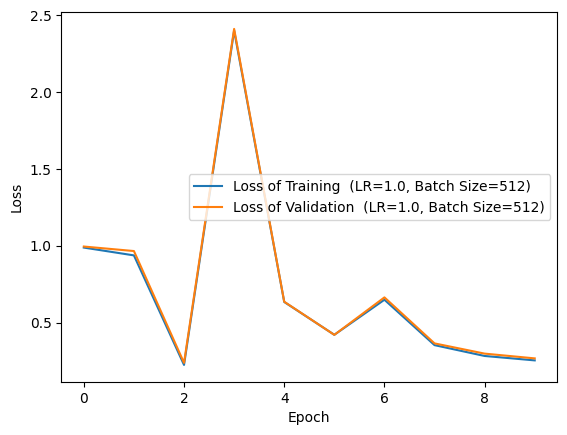

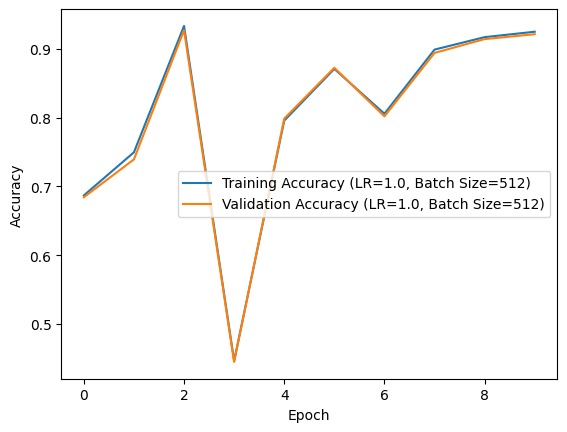

In [5]:
alphas = [0.001, 0.01, 0.1, 0.5, 1.0]
batchs_size = [32, 64, 128, 256, 512]
models = {}
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

for lr in alphas:
    for batch_size in batchs_size:
        print(f"\nTraining with Learning Rate: {lr}, Batch Size: {batch_size}")
        models[(batch_size, lr)] = training_loop(lr, batch_size)

Select the best model based on validation performance

In [6]:
least_loss = math.inf
best_model_of_models = None
best_parameters = None

for tuple1, tuple2 in models.items():
    model, loss = tuple2
    if loss < least_loss:
        best_parameters = tuple1
        least_loss = loss
        best_model_of_models = model

Evaluate the best model on the test set

In [7]:
model = best_model_of_models
test_loader = torch.utils.data.DataLoader(dataset=mnist_test_data, batch_size=best_parameters[0], shuffle=False)

loss_function = nn.CrossEntropyLoss()

test_set_loss = sum(loss_function(model(inputs), labels) for inputs, labels in test_loader)
test_set_loss /= len(test_loader)

test_set_accuracy = sum((model(inputs).argmax(dim=1) == labels).float().mean().item() for inputs, labels in test_loader)
test_set_accuracy /= len(test_loader)

# Print test results
print(f"Best parameters - Batch Size: {best_parameters[0]}, Learning Rate: {best_parameters[1]}")
print(f"Test loss of the best model is {test_set_loss: .4}")
print(f"Test accuracy of the best model is {test_set_accuracy: .4}")


Best parameters - Batch Size: 128, Learning Rate: 0.5
Test loss of the best model is  10.97
Test accuracy of the best model is  0.6877
